# Creating a new notebook

# link to tutorial I am following
# https://nextjournal.com/gkoehler/pytorch-mnist

### mnist contains 70,000 images of handwritten digits:
#### 60,000 for training my model 
#### 10,000 for testing my model
#### the images are grayscale 28 x 28 pixels 

In [1]:
# SETTING Up Environment
# importing torch which I will use for neural network
# creating a convolutional neural network = deep learning algorithm
import torch

In [2]:
import torchvision

In [3]:
# PREPARING Dataset

n_epochs = 3 # how many times we'll loop through training data
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01 # hyperparameter
momentum = 0.5 # hyperparameter
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
# downloading the files onto computer (even though I already have them)  I input 
# what directory I want the files to be in then it downloads it 

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/Users/betinakreiman/Desktop/Life/MachineLearning/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/Users/betinakreiman/Desktop/Life/MachineLearning/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [5]:
# looking at some examples with test_loader
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
# what the test data batch consists of 
example_data.shape
# so one test dat abatch is a tensor of shape torch.size([1000, 1, 28, 28])
# so we have 1000 examples of 28 x 28 pixels 

torch.Size([1000, 1, 28, 28])

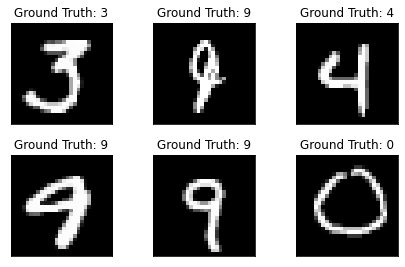

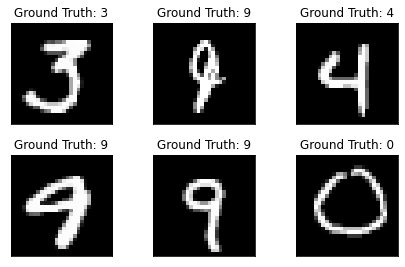

In [7]:
# here I am showing picutres and their actual value
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

# BUILDING the Network

In [ ]:
# using 2-D convolutional layers followed by 2 fully connected / linear layers
# using rectified lineary units 

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [24]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        # adding a fully connected layer
        #self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        #x = F.relu(self.fc2(x))
        #x = F.dropout(x, training=self.training)
        
        #x = self.fc3(x)

        return F.log_softmax(x)

In [25]:
# initializing network and optimizer
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [13]:
test_counter

[0, 60000, 120000, 180000]

# TRAINING the Model

In [26]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [33]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        #print(len(data))
        optimizer.zero_grad()
        print(data.shape)
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            #torch.save(network.state_dict(), '/results/model.pth')
            #torch.save(optimizer.state_dict(), '/results/optimizer.pth')


In [30]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))

In [31]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/Users/betinakreiman/opt/anaconda3/envs/pytorch_p37/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/Users/betinakreiman/opt/anaconda3/envs/pytorch_p37/lib/python3.7/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 1.2061, Accuracy: 7609/10000 (76%)

64
Train Epoch: 1 [0/60000 (0%)]	Loss: 1.409475
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [640/60000 (1%)]	Loss: 1.422173
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.207013
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.241501
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.252599
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.184079
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.050789
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.039289
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.067360
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.099004
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.968852
64
64
64
64
64
64
64
64
64
64
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.797041
64
64
64
64
64
64
64
64
64
64
Trai

# EVALUATING The Model's Performance

ValueError: x and y must be the same size

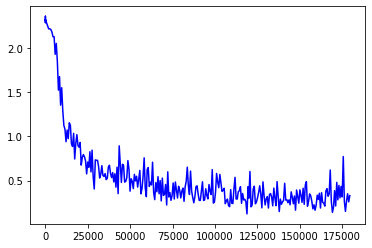

In [26]:
# plotting our training curve
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [43]:
with torch.no_grad():
    output = network(example_data)

/Users/betinakreiman/opt/anaconda3/envs/pytorch_p37/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


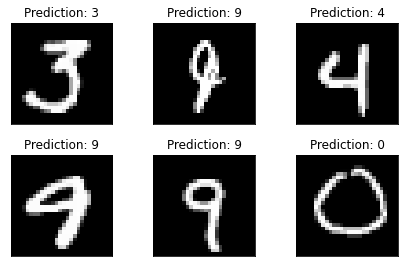

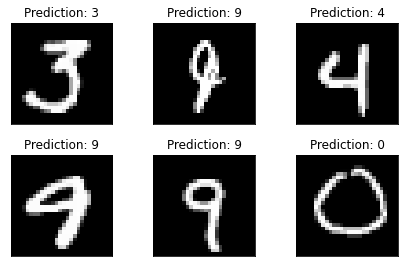

In [44]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
fig

# CONTINUED Training From Checkpoints

In [45]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)


In [1]:
import torch
import torchvision
from torch.utils.mobile_optimizer import optimize_for_mobile
modelForIos = network
modelForIos.eval()
example = torch.rand(1, 1, 28, 28)
traced_script_module = torch.jit.trace(modelForIos, example)
##torchscript_model_optimized = optimize_for_mobile(traced_script_module)
#torchscript_model_optimized._save_for_lite_interpreter("model/mnistModel.pt")

NameError: name 'network' is not defined

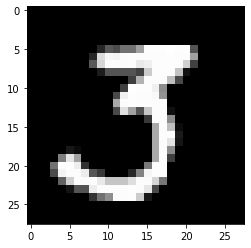

predicted tensor([3]) target tensor(3)


/Users/betinakreiman/opt/anaconda3/envs/pytorch_p37/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


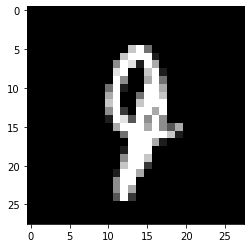

predicted tensor([9]) target tensor(9)


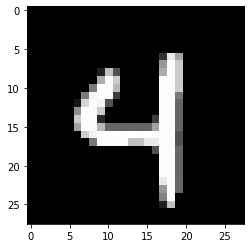

predicted tensor([4]) target tensor(4)


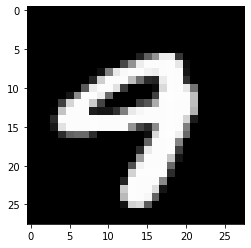

predicted tensor([9]) target tensor(9)


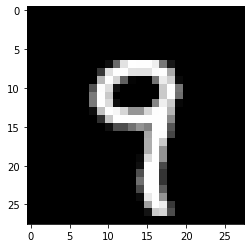

predicted tensor([9]) target tensor(9)


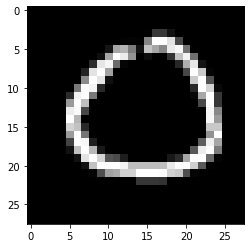

predicted tensor([0]) target tensor(0)


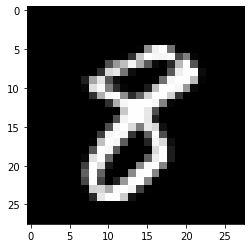

predicted tensor([8]) target tensor(8)


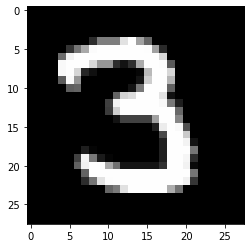

predicted tensor([3]) target tensor(3)


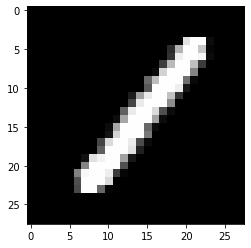

predicted tensor([1]) target tensor(1)


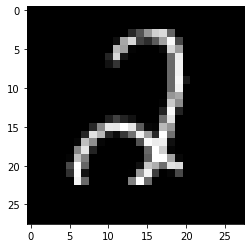

predicted tensor([2]) target tensor(2)


In [67]:

for i in range(10):
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.show()
    output = network(example_data)
    pred = output.data.max(1, keepdim=True)[1]
    target = example_targets[i]
    print("predicted", pred[i], "target", target)


/Users/betinakreiman/opt/anaconda3/envs/pytorch_p37/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


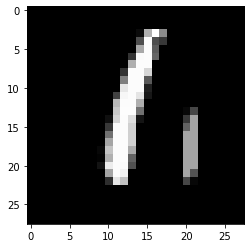

tensor([6]) tensor(1)


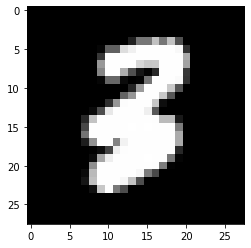

tensor([2]) tensor(3)


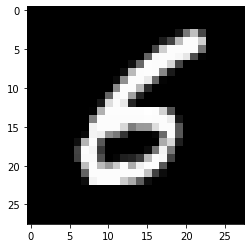

tensor([5]) tensor(6)


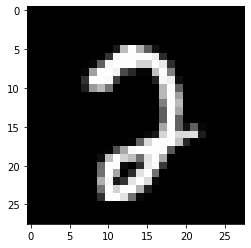

tensor([7]) tensor(2)


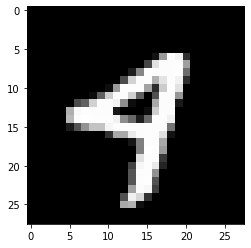

tensor([9]) tensor(4)


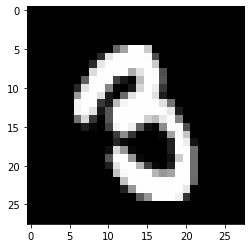

tensor([5]) tensor(3)


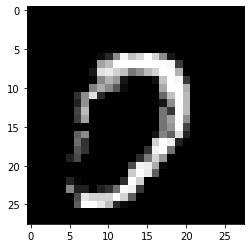

tensor([7]) tensor(0)


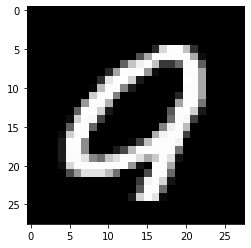

tensor([0]) tensor(9)


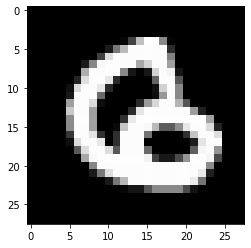

tensor([2]) tensor(6)


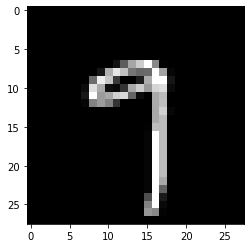

tensor([7]) tensor(9)


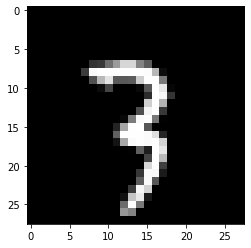

tensor([7]) tensor(3)


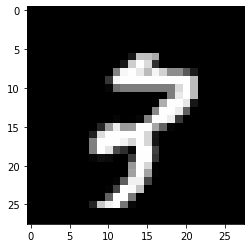

tensor([7]) tensor(3)


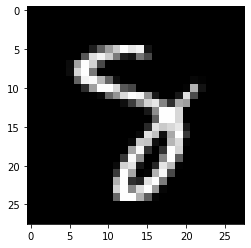

tensor([7]) tensor(8)


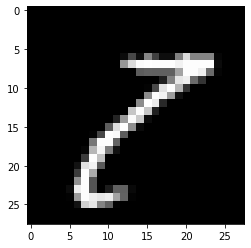

tensor([8]) tensor(7)


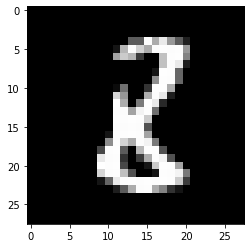

tensor([2]) tensor(8)


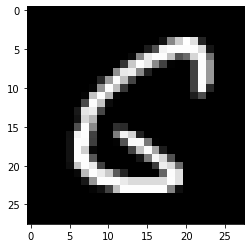

tensor([0]) tensor(6)


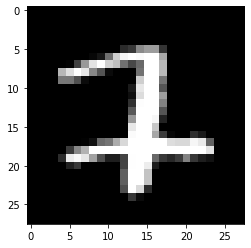

tensor([2]) tensor(7)


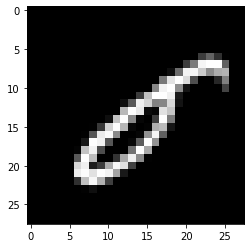

tensor([5]) tensor(0)


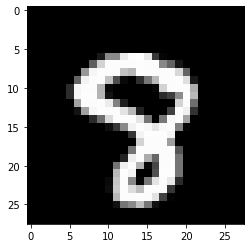

tensor([9]) tensor(8)


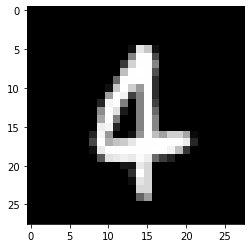

tensor([6]) tensor(4)


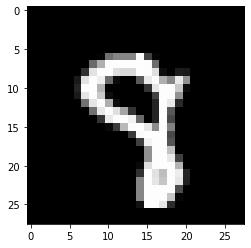

tensor([9]) tensor(8)


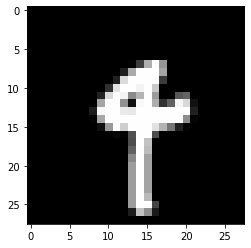

tensor([9]) tensor(4)


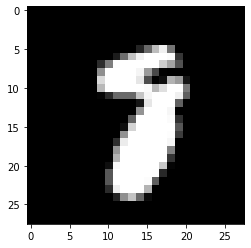

tensor([7]) tensor(8)


IndexError: index 1000 is out of bounds for dimension 0 with size 1000

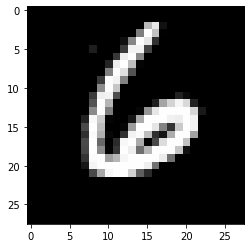

In [74]:
i = 0
count = 10
output = network(example_data)
pred = output.data.max(1, keepdim=True)[1]
while True:
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    target = example_targets[i]
    #plt.show()

    if pred[i] != target:
        plt.show()
        print(pred[i], target)
        count += 1

        if count == 10:
            break

    i = i + 1

